In [64]:
# import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [65]:
train = pd.read_csv("datasets/train_clean.csv")
test = pd.read_csv("datasets/test_clean.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other
0,1,0,3,"Braund, Mr. Owen Harris",1,3.135494,1,0,A/5 21171,2.110213,...,1,1,0,0,1.098612,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.663562,1,0,PC 17599,4.280593,...,1,0,1,0,1.098612,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,3.295837,0,0,STON/O2. 3101282,2.188856,...,1,1,0,0,0.693147,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.583519,1,0,113803,3.990834,...,1,1,0,0,1.098612,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,3.583519,0,0,373450,2.202765,...,1,1,0,0,0.693147,0,1,0,0,0


In [66]:
cabin_cols = [
    c for c in train.columns if "cabin" in c.lower() and "deck" not in c.lower()
]

In [67]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other
0,1,0,3,"Braund, Mr. Owen Harris",1,3.135494,1,0,A/5 21171,2.110213,...,1,1,0,0,1.098612,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.663562,1,0,PC 17599,4.280593,...,1,0,1,0,1.098612,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,3.295837,0,0,STON/O2. 3101282,2.188856,...,1,1,0,0,0.693147,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.583519,1,0,113803,3.990834,...,1,1,0,0,1.098612,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,3.583519,0,0,373450,2.202765,...,1,1,0,0,0.693147,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,3.332205,0,0,211536,2.639057,...,1,1,0,0,0.693147,0,0,0,0,1
885,888,1,1,"Graham, Miss. Margaret Edith",0,2.995732,0,0,112053,3.433987,...,1,1,0,0,0.693147,0,0,0,1,0
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,2.197225,1,2,W./C. 6607,3.196630,...,1,1,0,0,1.609438,0,0,0,1,0
887,890,1,1,"Behr, Mr. Karl Howell",1,3.295837,0,0,111369,3.433987,...,1,0,1,0,0.693147,0,1,0,0,0


In [68]:
# perform PCA on train
train_pca = train.drop(
    columns=[
        "Name",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
        "Survived",
        *cabin_cols,
    ]
)
test_pca = test.drop(
    columns=["Name", "Ticket", "Cabin", "Embarked", "PassengerId", *cabin_cols]
)

# standardize data
scaler = StandardScaler()
train_pca = scaler.fit_transform(train_pca)
test_pca = scaler.transform(test_pca)


# create up to n components, where n is the number of features
def apply_PCA(X, n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X)
    return pca


def get_ratio(X, n):
    pca = apply_PCA(X, n)
    return pca, sum(pca.explained_variance_ratio_)


N = [i for i in range(train_pca.shape[1])]

vars = []
for n in N:
    pca, var = get_ratio(train_pca, n)
    vars.append((pca, var))

vals = [tuple_[1] for tuple_ in vars]

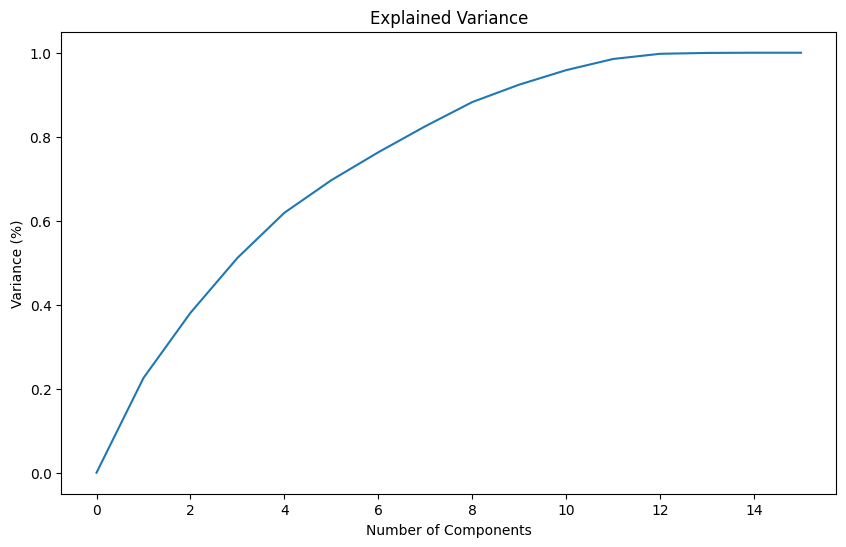

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=N, y=vals)
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.show()

In [70]:
vars

[(PCA(n_components=0), 0),
 (PCA(n_components=1), 0.22557411415397954),
 (PCA(n_components=2), 0.3806508725014411),
 (PCA(n_components=3), 0.5113978588807265),
 (PCA(n_components=4), 0.6189420762777097),
 (PCA(n_components=5), 0.6965306939788937),
 (PCA(n_components=6), 0.7629960177130806),
 (PCA(n_components=7), 0.8249164320877903),
 (PCA(n_components=8), 0.8825349308123815),
 (PCA(n_components=9), 0.9240044572693484),
 (PCA(n_components=10), 0.9585366610087702),
 (PCA(n_components=11), 0.9851089616517975),
 (PCA(n_components=12), 0.9974553650259759),
 (PCA(n_components=13), 0.9995020221500257),
 (PCA(n_components=14), 0.9999999999999999),
 (PCA(n_components=15), 0.9999999999999999)]

In [75]:
pca, ratio = vars[13]

train_clean_pca_transformed = pca.transform(train_pca)
test_clean_pca_transformed = pca.transform(test_pca)

In [76]:
train_clean_pca_transformed.shape, test_clean_pca_transformed.shape

((889, 13), (418, 13))

In [77]:
df_train_pca = pd.DataFrame(train_clean_pca_transformed)
df_test_pca = pd.DataFrame(test_clean_pca_transformed)

df_train_pca["Survived"] = train["Survived"]
df_test_pca["PassengerId"] = test["PassengerId"]

In [78]:
np.save("datasets/train_clean_pca_transformed.npy", train_clean_pca_transformed)
np.save("datasets/test_clean_pca_transformed.npy", test_clean_pca_transformed)

In [79]:
df_train_pca.to_csv("datasets/train_clean_pca_transformed.csv", index=False)
df_test_pca.to_csv("datasets/test_clean_pca_transformed.csv", index=False)